In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
users= pd.read_csv('takehome_users.csv', encoding= 'latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engagement= pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Exploring User Data

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### How many unique email addresses do we have? 

In [6]:
users.email.nunique()

11980

It looks like we have duplicate values in the email columns meaning that we may have users who registered twice using the same email

### Which creation sources are most common?

Text(0, 0.5, 'Creation Source')

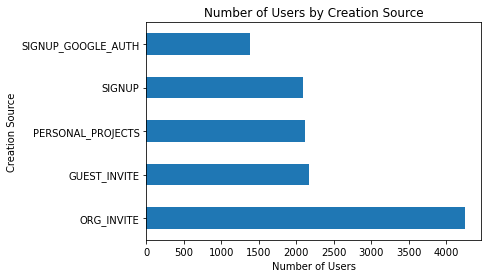

In [7]:
users.creation_source.value_counts().plot(kind='barh')
plt.title('Number of Users by Creation Source')
plt.xlabel('Number of Users')
plt.ylabel('Creation Source')

### What fraction of people opted in to the mailing list

In [8]:
no_email_list= users.opted_in_to_mailing_list.value_counts()[0]
email_list= users.opted_in_to_mailing_list.value_counts()[1]

print('{}% DID NOT Opt in to the mailing list'.format(round(no_email_list/len(users) * 100),2))
print('{}% DID NOT Opt in to the mailing list'.format(round(email_list/len(users) * 100),2))

75.0% DID NOT Opt in to the mailing list
25.0% DID NOT Opt in to the mailing list


### How many unique org IDs are there? 

In [9]:
users.org_id.nunique()

417

### How many users were enabled for marketing drip?

In [10]:
no_drip= users.enabled_for_marketing_drip.value_counts()[0]
drip= users.enabled_for_marketing_drip.value_counts()[1]

print('{}% NOT Enabled for marketing drip'.format(round(no_drip/len(users) * 100),2))
print('{}% Eabled for marketing drip'.format(round(drip/len(users) * 100),2))

85.0% NOT Enabled for marketing drip
15.0% Eabled for marketing drip


# Identifying Adopted Users

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [11]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [12]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [13]:
# Narrowing down users who logged in 3 times in total
three_logins = engagement.groupby('user_id').filter(lambda x: len(x) >=3)
print('There are {} unique users who logged in 3 times or more in total'\
      .format(len(three_logins['user_id'].unique())))

three_logins.head()

There are 2248 unique users who logged in 3 times or more in total


,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [14]:
three_logins.reset_index(drop=True, inplace = True)

# Finding how many users meet our full adoption criteria

adopted = 0
adopted_users = []
for i in range(len(three_logins)-2):
    user = three_logins['user_id'][i]
    if user != adopted and user == three_logins['user_id'][i+2]:
    # Get start date 
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('7D')
        if sd < pd.Timestamp(three_logins['time_stamp'][i+1]) < ed and sd < \
        pd.Timestamp(three_logins['time_stamp'][i+2]) < ed:
            adopted_users.append(user)
            adopted = user

In [15]:
len(adopted_users)

1602

#### Adding adopted column to the user dataset. 

Those adopted will have a value of 1
Those not adopted will have a value of 0

In [16]:
# Extract object_ids as a list
ids= list(users['object_id'])
# Create emtpy list to store adopted labels
adopted_labels= []

# Loop through ids and append appropriate label to adopted_labels
for i in ids:
    if i in adopted_users:
        adopted_labels.append(1)
    else:
        adopted_labels.append(0)

In [17]:
# Make sure we have to appropriate number of adopted users
users['Adopted']= adopted_labels

users.Adopted.value_counts()

0    10398
1     1602
Name: Adopted, dtype: int64

In [73]:
adoption_pcts= users.Adopted.value_counts() / len(users) * 100
print('Adoption Rate Percentage')
adoption_pcts

Adoption Rate Percentage


0    86.65
1    13.35
Name: Adopted, dtype: float64

# Differences Amongst Groups

In [19]:
adopted_df= users[users.Adopted == 1]
non_adopted_df= users[users.Adopted == 0]
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 1 to 11987
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   1602 non-null   int64  
 1   creation_time               1602 non-null   object 
 2   name                        1602 non-null   object 
 3   email                       1602 non-null   object 
 4   creation_source             1602 non-null   object 
 5   last_session_creation_time  1602 non-null   float64
 6   opted_in_to_mailing_list    1602 non-null   int64  
 7   enabled_for_marketing_drip  1602 non-null   int64  
 8   org_id                      1602 non-null   int64  
 9   invited_by_user_id          913 non-null    float64
 10  Adopted                     1602 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 150.2+ KB


### Looking at creation source discrepancies

In [54]:
# Compute value count percentages for creation source
adopted_creation= round(adopted_df.creation_source.value_counts() / len(adopted_df) * 100, 2)
non_adopted_creation= round(non_adopted_df.creation_source.value_counts() / len(non_adopted_df) * 100, 2)


In [55]:
# Turn those percentage to a dataframe for easy plotting
creation_sources= pd.DataFrame(adopted_creation).reset_index()
creation_sources.rename(columns={'index': "Creation_Source", "creation_source":"Adopted Class PCT"}, inplace=True)
temp_df= pd.DataFrame(non_adopted_creation).reset_index()
temp_df.rename(columns={'index': "Creation_Source", "creation_source":"Non-Adopted Class PCT"}, inplace=True)

creation_sources= pd.merge(left= creation_sources, right= temp_df, how='left', on= 'Creation_Source')
creation_sources= creation_sources.melt(id_vars= "Creation_Source", value_vars=["Adopted Class PCT","Non-Adopted Class PCT"])

Text(0, 0.5, 'Creation Source')

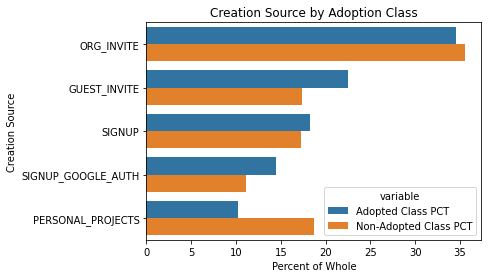

In [57]:
# Plot the creation sources
sns.barplot(x= "value", y="Creation_Source",  hue= "variable", data= creation_sources)
plt.title('Creation Source by Adoption Class')
plt.xlabel('Percent of Whole')
plt.ylabel('Creation Source')

Those who signup through a personal project are less likely to adopt the product. 

Other than that adoption rates are fairly similar amongst classes. 

### Looking at mailing list and marketing discrepancies?

In [61]:
mailing_list= users[users.opted_in_to_mailing_list == 1]
non_mailing_list= users[users.opted_in_to_mailing_list == 0]

mailing_list_adoption= round(mailing_list.Adopted.value_counts() / len(mailing_list) * 100, 2)
non_mailing_list_adoption= round(non_mailing_list.Adopted.value_counts() / len(non_mailing_list) * 100, 2)

print('Adoption Rate for Mailing List')
print(mailing_list_adoption)
print('/n')
print('Adoption Rate for Non Mailing List')
print(non_mailing_list_adoption)

Adoption Rate for Mailing List
0    86.17
1    13.83
Name: Adopted, dtype: float64
/n
Adoption Rate for Non Mailing List
0    86.81
1    13.19
Name: Adopted, dtype: float64


Adoption Rates are the same for those who opted in and those who did not opt in to the mailing list

In [63]:
marketing_drip= users[users.enabled_for_marketing_drip == 1]
non_marketing_drip= users[users.enabled_for_marketing_drip == 0]

marketing_drip_adoption= round(marketing_drip.Adopted.value_counts() / len(marketing_drip) * 100, 2)
non_marketing_drip_adoption= round(non_marketing_drip.Adopted.value_counts() / len(non_marketing_drip) * 100, 2)

print('Adoption Rate for those on Marketing Drip')
print(marketing_drip_adoption)
print('/n')
print('Adoption Rate for those NOT on Marketing Drip')
print(non_marketing_drip_adoption)

Adoption Rate for those on Marketing Drip
0    86.27
1    13.73
Name: Adopted, dtype: float64
/n
Adoption Rate for those NOT on Marketing Drip
0    86.72
1    13.28
Name: Adopted, dtype: float64


Adoption rate are the same for those in the marketing drip and those not in the marketing drip

### Does adoption rate differ between those who were and were not refered by another user? 

In [71]:
refered= users[users.invited_by_user_id.notnull()]
not_refered= users[users.invited_by_user_id.isnull()]

refered_adoption= round(refered.Adopted.value_counts() / len(refered) * 100, 2)
print('Adoption Rate for those with Invited By IDs')
print(refered_adoption)
print('\n')

not_refered_adoption= round(not_refered.Adopted.value_counts() / len(not_refered) * 100, 2)
print('Adoption Rate for those without Invited By IDs')
print(not_refered_adoption)

Adoption Rate for those with Invited By IDs
0    85.77
1    14.23
Name: Adopted, dtype: float64


Adoption Rate for those without Invited By IDs
0    87.66
1    12.34
Name: Adopted, dtype: float64
